In [19]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("MF_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [20]:
data

['t_n61          2.5091 ( 1.9481,  3.1081) ( 1.9367,  3.0912)  1.1545 (Jnode 118)\n',
 't_n62          0.7802 ( 0.6108,  0.9848) ( 0.6012,  0.9726)  0.3715 (Jnode 117)\n',
 't_n63          0.7538 ( 0.5907,  0.9484) ( 0.5762,  0.9324)  0.3563 (Jnode 116)\n',
 't_n64          0.7310 ( 0.5737,  0.9198) ( 0.5650,  0.9088)  0.3438 (Jnode 115)\n',
 't_n65          0.5223 ( 0.4195,  0.5771) ( 0.4363,  0.5874)  0.1511 (Jnode 114)\n',
 't_n66          0.2871 ( 0.2192,  0.3446) ( 0.2221,  0.3469)  0.1248 (Jnode 113)\n',
 't_n67          0.2430 ( 0.1837,  0.2970) ( 0.1872,  0.2999)  0.1127 (Jnode 112)\n',
 't_n68          0.1584 ( 0.1155,  0.2024) ( 0.1138,  0.2006)  0.0867 (Jnode 111)\n',
 't_n69          0.0156 ( 0.0073,  0.0284) ( 0.0062,  0.0263)  0.0201 (Jnode 110)\n',
 't_n70          0.1984 ( 0.1477,  0.2478) ( 0.1465,  0.2463)  0.0998 (Jnode 109)\n',
 't_n71          0.1470 ( 0.0944,  0.2015) ( 0.0936,  0.2004)  0.1068 (Jnode 108)\n',
 't_n72          0.0412 ( 0.0256,  0.0616) ( 0.0243,  

In [21]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [22]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [23]:
node_name

['t_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119']

In [24]:
posterior_mean_iqtree

[2.5091,
 0.7802,
 0.7538,
 0.731,
 0.5223,
 0.2871,
 0.243,
 0.1584,
 0.0156,
 0.1984,
 0.147,
 0.0412,
 0.2473,
 0.1687,
 0.1963,
 0.0574,
 0.0186,
 0.0048,
 0.6788,
 0.5368,
 0.3888,
 0.2961,
 0.15,
 0.2445,
 0.3214,
 0.301,
 0.1983,
 0.1165,
 0.0857,
 0.036,
 0.1691,
 0.1273,
 0.1869,
 0.285,
 0.229,
 0.1777,
 0.1187,
 0.047,
 0.0346,
 0.0259,
 0.0166,
 0.084,
 0.0284,
 0.1654,
 0.1151,
 0.078,
 0.0214,
 0.1806,
 0.1151,
 0.6263,
 0.5806,
 0.23,
 0.0545,
 0.0432,
 0.0143,
 0.1228,
 0.0941,
 2.0406,
 1.0479]

In [25]:
lower_ci_iqtree

[]

In [26]:
upper_ci_iqtree

[]

In [27]:
file_LG = open("GTR_G4_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [29]:
posterior_mean_baseml

[2.4912,
 0.7752,
 0.7462,
 0.7228,
 0.5226,
 0.2888,
 0.2448,
 0.1606,
 0.0162,
 0.1997,
 0.148,
 0.0409,
 0.2501,
 0.1723,
 0.2013,
 0.0604,
 0.0189,
 0.0048,
 0.6702,
 0.5297,
 0.3845,
 0.2939,
 0.1494,
 0.2426,
 0.3163,
 0.2963,
 0.1963,
 0.1143,
 0.0861,
 0.0361,
 0.1667,
 0.1253,
 0.1843,
 0.2842,
 0.2285,
 0.1787,
 0.1191,
 0.0471,
 0.0349,
 0.0261,
 0.0167,
 0.0844,
 0.0288,
 0.1664,
 0.1157,
 0.0781,
 0.0215,
 0.1801,
 0.1147,
 0.6242,
 0.5776,
 0.2303,
 0.055,
 0.0436,
 0.0138,
 0.1257,
 0.0963,
 2.0416,
 1.0502]

In [30]:
posterior_mean_iqtree

[2.5091,
 0.7802,
 0.7538,
 0.731,
 0.5223,
 0.2871,
 0.243,
 0.1584,
 0.0156,
 0.1984,
 0.147,
 0.0412,
 0.2473,
 0.1687,
 0.1963,
 0.0574,
 0.0186,
 0.0048,
 0.6788,
 0.5368,
 0.3888,
 0.2961,
 0.15,
 0.2445,
 0.3214,
 0.301,
 0.1983,
 0.1165,
 0.0857,
 0.036,
 0.1691,
 0.1273,
 0.1869,
 0.285,
 0.229,
 0.1777,
 0.1187,
 0.047,
 0.0346,
 0.0259,
 0.0166,
 0.084,
 0.0284,
 0.1654,
 0.1151,
 0.078,
 0.0214,
 0.1806,
 0.1151,
 0.6263,
 0.5806,
 0.23,
 0.0545,
 0.0432,
 0.0143,
 0.1228,
 0.0941,
 2.0406,
 1.0479]

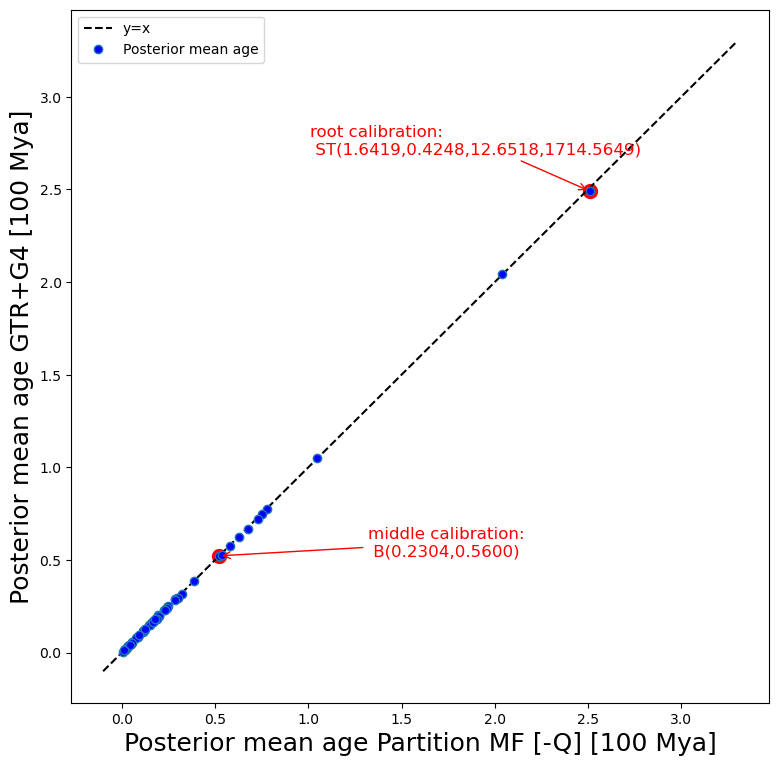

In [31]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,3.3], 
        [-0.1, 3.3], 
        'k--', label='y=x')
points = ax.plot(posterior_mean_iqtree, posterior_mean_baseml, 'o', label='Posterior mean age')

points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
ax.scatter(posterior_mean_iqtree[4], posterior_mean_baseml[4], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n ST(1.6419,0.4248,12.6518,1714.5649)', 
        xy=(posterior_mean_iqtree[0], posterior_mean_baseml[0]), 
        xytext=(posterior_mean_iqtree[0]-1.5,  posterior_mean_baseml[0]+0.2 ),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
ax.annotate('middle calibration:\n B(0.2304,0.5600)', 
        xy=(posterior_mean_iqtree[4], posterior_mean_baseml[4]), 
        xytext=(posterior_mean_iqtree[4]+0.8 ,  posterior_mean_baseml[4] ),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
 
# Labels and title
ax.set_ylabel('Posterior mean age GTR+G4 [100 Mya]', fontsize=18)
ax.set_xlabel('Posterior mean age Partition MF [-Q] [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and Partition MF [-p] [t199 ~ B(10.3300,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./afrotheria_posterior_mean_age_comparison_partition_MF_p_middle_scatter.png')

In [32]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')